In [58]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
img = cv2.imread('../Reference/DATA/00-puppy.jpg')

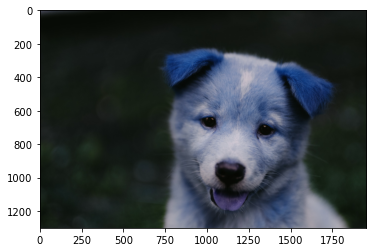

In [13]:
plt.imshow(img)

# COLOR - MAPPINGS

The default color space when read using opencv is BGR. 
We can convert it using cvtColor

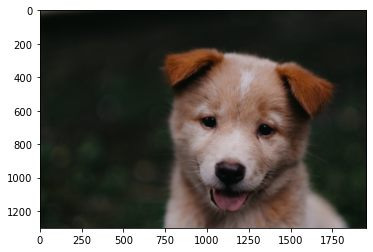

In [14]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

## HSV 

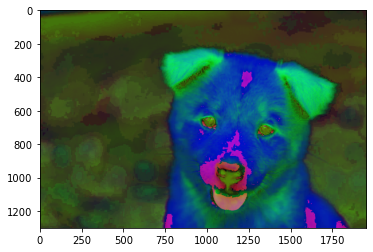

In [15]:
img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.imshow(img)

## HLS

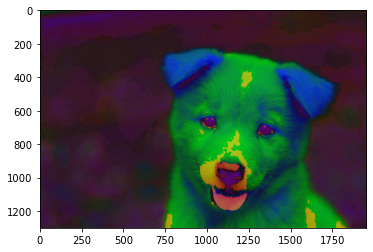

In [16]:
img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
img = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
plt.imshow(img)

# BLENDING AND PASTING IMAGES

## Blending Image

Read two images and convert to RGB

In [17]:
img1 = cv2.imread('../Reference/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('../Reference/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

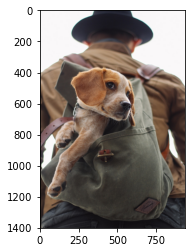

In [20]:
plt.imshow(img1)

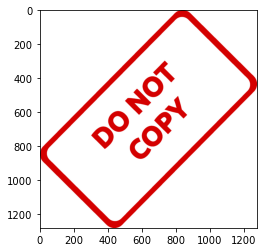

In [19]:
plt.imshow(img2)

In [37]:
img1.shape

(1401, 934, 3)

In [23]:
img2.shape

(1280, 1277, 3)

### BLENDING IMAGES OF SAME SIZE

 Before Blending we should resize the images to same dimensions so that we can blend one on top of another

In [24]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

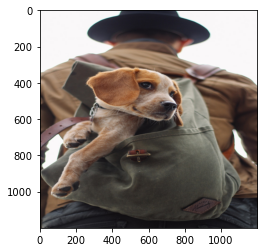

In [25]:
plt.imshow(img1)

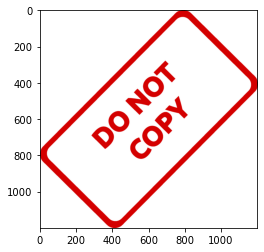

In [26]:
plt.imshow(img2)

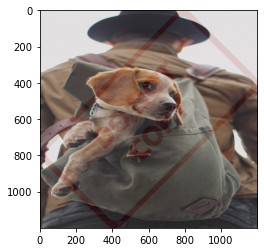

In [29]:
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.1,gamma=0)
plt.imshow(blended)

### OVERLAY SMALL IMAGE ON TOP OF LARGE IMAGE i.e NO BLENDING

Using Numpy reassignment

In [30]:
img1 = cv2.imread('../Reference/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('../Reference/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [31]:
img2 = cv2.resize(img2,(600,600))

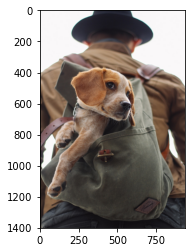

In [33]:
plt.imshow(img1)

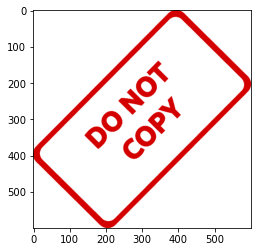

In [32]:
plt.imshow(img2)

In [34]:
large_img = img1
small_img = img2

In [35]:
x_offset = 0
y_offset = 0

In [38]:
x_end = x_offset + small_img.shape[1] 
y_end = y_offset + small_img.shape[0]

In [39]:
small_img.shape

(600, 600, 3)

In [40]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

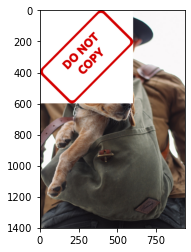

In [41]:
plt.imshow(large_img)

### Blend together Images of Different Sizes

In [42]:
img1 = cv2.imread('../Reference/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('../Reference/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [43]:
img2 = cv2.resize(img2,(600,600))

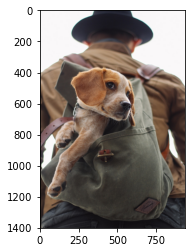

In [44]:
plt.imshow(img1)

First Get the Region of Interest from larger Image to overlay smaller Image

In [45]:
img1.shape

(1401, 934, 3)

In [46]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [47]:
img2.shape

(600, 600, 3)

In [48]:
rows,columns,channels = img2.shape

In [50]:
roi = img1[y_offset:1401,x_offset:934]

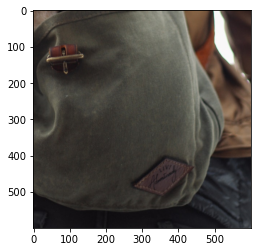

In [51]:
plt.imshow(roi)

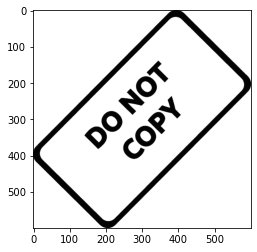

In [52]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray,cmap='gray')

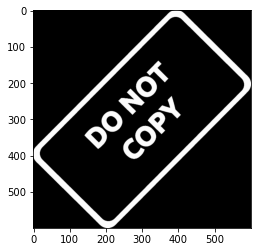

In [55]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv,cmap='gray')

In [56]:
mask_inv.shape

(600, 600)

WE should convert shape as to match with image we should blend

In [59]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [61]:
white_background.shape

(600, 600, 3)

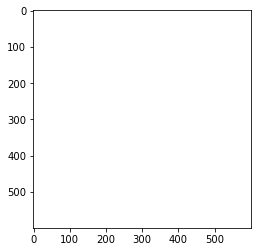

In [62]:
plt.imshow(white_background)

In [63]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

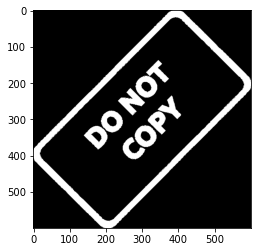

In [64]:
plt.imshow(bk)

In [65]:
bk.shape

(600, 600, 3)

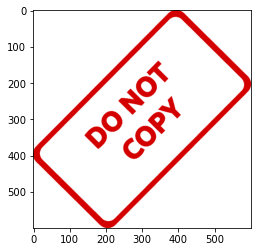

In [66]:
plt.imshow(img2)

In [67]:
fg = cv2.bitwise_or(img2,img2,mask = mask_inv)

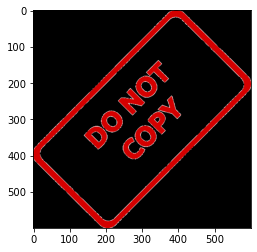

In [68]:
plt.imshow(fg)

Mask allows anything of white to passthrough and black to stop in the above case

In [69]:
final_roi = cv2.bitwise_or(roi,fg)

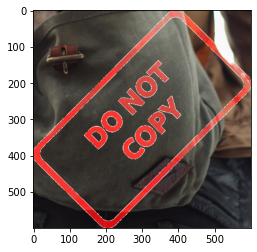

In [70]:
plt.imshow(final_roi)

In [71]:
 large_img = img1
small_img = img2

In [73]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = final_roi

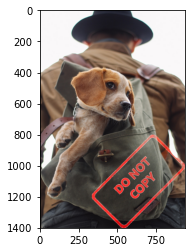

In [74]:
plt.imshow(large_img)